In [84]:
import pandas as pd
import numpy as np
df = pd.read_csv('../build/trajectory_log.csv')
print(df.describe())
df

              seq           x            y
count  500.000000  500.000000   500.000000
mean    10.000000  914.397257  1128.744820
std      5.750316    4.739974     0.020056
min      1.000000  909.382264  1128.716820
25%      5.000000  910.309870  1128.725437
50%     10.000000  912.972687  1128.745340
75%     15.000000  917.431239  1128.762933
max     19.000000  928.966497  1128.827660


,seq,x,y
0,1,909.382264,1128.76903
1,1,909.382270,1128.76903
2,1,909.382316,1128.76903
3,1,909.382440,1128.76903
4,1,909.382681,1128.76902
5,1,909.383078,1128.76902
6,1,909.383667,1128.76902
7,1,909.384487,1128.76901
8,1,909.385575,1128.76900
9,1,909.386968,1128.76899


In [85]:
last_seq = df.seq.values[0]
x=[]
y=[]
last_x = -1e9

df_vehicle = pd.DataFrame({'seq': [], 'x': [], 'y': []})


for (idx,seq) in enumerate(df.seq):
    if seq != last_seq:
        print(last_seq, seq, df.x[idx])
        df_temp = df[ (df['seq'] == last_seq) & (df.x < df.x[idx]) ]
        print(df_temp)
        df_vehicle = df_vehicle.append(df_temp)
        last_seq = seq
        

1 3 909.396315
    seq           x           y
0     1  909.382264  1128.76903
1     1  909.382270  1128.76903
2     1  909.382316  1128.76903
3     1  909.382440  1128.76903
4     1  909.382681  1128.76902
5     1  909.383078  1128.76902
6     1  909.383667  1128.76902
7     1  909.384487  1128.76901
8     1  909.385575  1128.76900
9     1  909.386968  1128.76899
10    1  909.388702  1128.76898
11    1  909.390814  1128.76896
12    1  909.393340  1128.76894
3 5 909.63297
    seq           x           y
50    3  909.396315  1128.76892
51    3  909.400027  1128.76889
52    3  909.404264  1128.76885
53    3  909.409048  1128.76882
54    3  909.414401  1128.76877
55    3  909.420345  1128.76873
56    3  909.426902  1128.76867
57    3  909.434096  1128.76862
58    3  909.441946  1128.76855
59    3  909.450476  1128.76849
60    3  909.459708  1128.76841
61    3  909.469662  1128.76833
62    3  909.480360  1128.76825
63    3  909.491825  1128.76816
64    3  909.504076  1128.76806
65    3  90

In [86]:
len(df_vehicle)
df_vehicle.head(10)

,seq,x,y
0,1.0,909.382264,1128.76903
1,1.0,909.382270,1128.76903
2,1.0,909.382316,1128.76903
3,1.0,909.382440,1128.76903
4,1.0,909.382681,1128.76902
5,1.0,909.383078,1128.76902
6,1.0,909.383667,1128.76902
7,1.0,909.384487,1128.76901
8,1.0,909.385575,1128.76900
9,1.0,909.386968,1128.76899


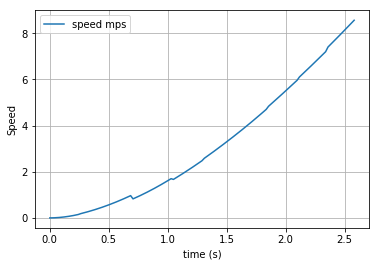

In [87]:
positions = df_vehicle.values[:,1:]
move_vector = np.diff(positions, axis=0)
dT=0.02
speed = np.sqrt(np.sum(move_vector**2, axis=1))/dT 

import matplotlib.pyplot as plt

time=np.linspace(0.0,speed.shape[0]*0.02,num=speed.shape[0])

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(time,speed, label='speed mps')
ax.grid('on')
ax.legend()

ax.set_xlabel('time (s)')
ax.set_ylabel('Speed')

# ax = plt.subplot(122)
# ax.plot(speed * 2.23694, label='speed mph')
# ax.legend()
# ax.grid('on')

plt.show()

In [88]:
150*0.02

3.0